<a href="https://colab.research.google.com/github/Adriana0015/iayaa-Equipo-15/blob/main/SVD_Equipo15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 10**
###**Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Nombres y matrículas de los integrantes del equipo:**

*   Adriana Fernanda Jimenez Avalos - A01087695
*  Vladimir Salazar Altamirano - A01793118 
*  Pablo Alejandro Colunga Vázquez - A01793671 
*  Julián Valera Juárez - A01793875 
*  Luis Daniel Rivera Salinas - A01374997 

In [1]:
# Módulos, librerías y paquetes

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import seaborn as sns
import requests, zipfile, io
from io import BytesIO

# Ejercicio-1.
Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios
(user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega sus primeros 10 renglones.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip'
file_name_rc = 'rating_final.csv'
file_name_geo = 'geoplaces2.csv'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
df_rating = pd.read_csv(file_name_rc, sep=',', encoding = 'latin1')
df_rating

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [3]:
#Leemos el archivo geoplaces2.csv
dfg2_restaurante = pd.read_csv(file_name_geo, sep=',', on_bad_lines='skip', encoding='latin-1')
dfg2_restaurante

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,132866,22.141220,-100.931311,0101000020957F000013871838EC4A58C1B5DF74F8E396...,Chaires,Ricardo B. Anaya,San Luis Potosi,San Luis Potosi,Mexico,?,...,No_Alcohol_Served,not permitted,informal,completely,medium,?,familiar,f,closed,none
126,135072,22.149192,-101.002936,0101000020957F0000E7B79B1DB94758C1D29BC363D8AA...,Sushi Itto,Venustiano Carranza 1809 C Polanco,San Luis Potosi,SLP,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,sushi-itto.com.mx,familiar,f,closed,none
127,135109,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,?,?,?,?,?,...,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
128,135019,18.875011,-99.159422,0101000020957F0000B49B2E5C6E785AC12F9D58435241...,Restaurant Bar Coty y Pablo,Paseo de Las Fuentes 24 Pedregal de Las Fuentes,Jiutepec,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none


In [4]:
#Vemos nombre de las columnas
dfg2_restaurante.columns

Index(['placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address',
       'city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')

In [5]:
#Creamos dataframe con el placeID y name
dfname_restaurante = dfg2_restaurante[["placeID", "name"]]

In [6]:
#Vemos el dataframe
dfname_restaurante

,placeID,name
0,134999,Kiku Cuernavaca
1,132825,puesto de tacos
2,135106,El Rincón de San Francisco
3,132667,little pizza Emilio Portes Gil
4,132613,carnitas_mata
...,...,...
125,132866,Chaires
126,135072,Sushi Itto
127,135109,Paniroles
128,135019,Restaurant Bar Coty y Pablo


In [7]:
#Mezclamos el dataframe con placeID y name con el dataframe que solamente tiene ID
df_rating = pd.merge(df_rating, dfname_restaurante, on = "placeID", how = "outer")

In [8]:
#Visualizamos cómo quedó el dataframe
print(df_rating.head())

  userID  placeID  rating  food_rating  service_rating                    name
0  U1077   135085       2            2               2  Tortas Locas Hipocampo
1  U1108   135085       1            2               1  Tortas Locas Hipocampo
2  U1081   135085       1            2               1  Tortas Locas Hipocampo
3  U1056   135085       2            2               2  Tortas Locas Hipocampo
4  U1134   135085       2            1               2  Tortas Locas Hipocampo


In [9]:
#Creamos una tabla que como renglones tenga a los usuarios, como columnas los nombres del restaurante, y como valores la calificación
table = pd.pivot_table(df_rating, values='rating', index= 'userID', columns="name")

In [10]:
#Visualizamos la tabla
print(table.head(10))

name    Abondance Restaurante Bar  Arrachela Grill  Cabana Huasteca  \
userID                                                                
U1001                         NaN              NaN              NaN   
U1002                         NaN              NaN              NaN   
U1003                         NaN              NaN              2.0   
U1004                         NaN              NaN              NaN   
U1005                         NaN              NaN              NaN   
U1006                         NaN              NaN              NaN   
U1007                         NaN              NaN              NaN   
U1008                         1.0              NaN              NaN   
U1009                         NaN              NaN              1.0   
U1010                         NaN              NaN              NaN   

name    Cafe Chaires  Cafeteria cenidet  Cafeteria y Restaurant El Pacifico  \
userID                                                              

In [11]:
list (table.columns)

['Abondance Restaurante Bar',
 'Arrachela Grill',
 'Cabana Huasteca',
 'Cafe Chaires',
 'Cafeteria cenidet',
 'Cafeteria y Restaurant El Pacifico',
 'Carls Jr',
 'Carnitas Mata  Calle 16 de Septiembre',
 'Carreton de Flautas y Migadas',
 'Cenaduria El RincÃ³n de Tlaquepaque',
 'Chaires',
 'Chilis Cuernavaca',
 'Dominos Pizza',
 'El Club',
 'El Herradero Restaurante and Bar',
 'El Mundo de la Pasta',
 'El Oceano Dorado',
 'El Rincon de San Francisco',
 'El Rincón de San Francisco',
 'El angel Restaurante',
 'El cotorreo',
 'Giovannis',
 'Gordas de morales',
 'Gorditas Doa Gloria',
 'Gorditas Dona Tota',
 'Hamburguesas La perica',
 'Hamburguesas Valle Dorado',
 'Hamburguesas saul',
 'KFC',
 'Kiku Cuernavaca',
 'Koye Sushi',
 'La Cantina Restaurante',
 'La Estrella de Dimas',
 'La Fontana Pizza Restaurante and Cafe',
 'La Posada del Virrey',
 'La Virreina',
 'Little Cesarz',
 'Log Yin',
 'Los Vikingos',
 'Luna Cafe',
 'Mariscos El Pescador',
 'Mariscos Tia Licha',
 'McDonalds Centro',
 'M

# Ejercicio-2.
Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes,
obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.

In [12]:
import numpy as np
import sklearn
from sklearn.decomposition import TruncatedSVD

In [13]:
#En el ejercicio anterior se muestran muchos datos NA, aqui se llenan con cero.
table = table.fillna(0)

In [14]:
#Aplicamos la factorización SVD utilizando todas las componentes.
X = table.values.T
SVD = TruncatedSVD(n_components=129, random_state=0)
matrix = SVD.fit_transform(X)

In [15]:
#Visualizamos el tamaño de la matriz.
X.shape

(129, 138)

In [16]:
#Imprimimos la cantidad de valores singulares obtenidos.
print("La cantidad de valores singulares obtenidos es", len(SVD.singular_values_))

La cantidad de valores singulares obtenidos es 129


# Ejercicio-3.
Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.

In [17]:
#Obtenemos la corrrelación de cada restaurante respecto a los demás.
corr = np.corrcoef(matrix)
restaurantes = table.columns
print(corr)

[[ 1.00000000e+00 -6.11069671e-05 -4.09021196e-03 ... -2.23463297e-03
  -1.48314619e-03  6.49857137e-04]
 [-6.11069671e-05  1.00000000e+00 -4.19017007e-04 ... -2.28924375e-04
  -1.51939186e-04  6.65738585e-05]
 [-4.09021196e-03 -4.19017007e-04  1.00000000e+00 ...  1.46935027e-01
  -1.01700920e-02  4.45613987e-03]
 ...
 [-2.23463297e-03 -2.28924375e-04  1.46935027e-01 ...  1.00000000e+00
  -5.55629465e-03  2.43455282e-03]
 [-1.48314619e-03 -1.51939186e-04 -1.01700920e-02 ... -5.55629465e-03
   1.00000000e+00  1.61583481e-03]
 [ 6.49857137e-04  6.65738585e-05  4.45613987e-03 ...  2.43455282e-03
   1.61583481e-03  1.00000000e+00]]


In [18]:
#Hacemos una lista con los restaurantes.
restaurantes_list = list(restaurantes)

In [19]:
#Buscamos la correlación de los demás restaurantes con "Subway".
subway = restaurantes_list.index('Subway')
corr_subway = corr[subway]

In [20]:
#Imprimimos las correlaciones de los demás restaurantes con Subway.
print(corr_subway)

[-7.69028369e-04 -7.87822168e-05 -5.27330975e-03  8.58511349e-04
 -3.03891148e-03  3.97495832e-05 -1.54820208e-03 -5.29347145e-03
  7.27520383e-04 -1.55098452e-03 -1.84483094e-03  3.01090491e-01
 -3.06938616e-05 -3.66639157e-03 -2.28024815e-03 -1.70971180e-03
  2.66961340e-03  4.58467365e-04 -2.11449533e-03 -6.20445134e-03
  3.34268563e-03  1.16598607e-01  1.87080102e-03  2.53682556e-03
 -5.48801141e-03 -2.91288266e-03  2.02825342e-03 -1.36607265e-03
 -2.01695899e-03  1.12058244e-01 -2.36235727e-03  6.52159239e-04
  3.53495770e-03 -3.62793330e-03  1.69065407e-03 -4.51837401e-03
 -2.09301342e-03  2.34634298e-01 -3.80413494e-03 -5.11845710e-04
 -2.27148704e-03  3.88178002e-01 -2.07427108e-03 -2.29428835e-03
  1.32565455e-03  3.01002479e-01  1.71433518e-01 -3.29715354e-03
 -4.74480596e-03 -8.02527884e-04 -2.65071452e-03  1.12018889e-01
 -3.91080724e-03 -2.06369812e-03  1.16008629e-01  2.27855804e-01
  4.28342495e-04 -8.69739761e-04  6.09520875e-01 -6.43364064e-03
  4.25467169e-01 -2.27256

In [21]:
#Generamos las 10 mejores recomendaciones para alguien a quien le gusta "Subway"
recomendaciones = list(restaurantes[(corr_subway > 0.23) & (corr_subway < 1.0)])


recomendaciones

['Chilis Cuernavaca',
 'Log Yin',
 'Mariscos Tia Licha',
 'Mikasa',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Restaurant los Pinos',
 'Rincon del Bife',
 'Sanborns Casa Piedra',
 'Vips']

In [22]:
#Imprimimos las correlaciones de los ratings de los usarios de cada restaurante respecto a "Subway"
for r in recomendaciones:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_subway[ind]
  print("Su correlación es de", c)

El restaurante recomendado es ----- Chilis Cuernavaca
Su correlación es de 0.3010904910449609
El restaurante recomendado es ----- Log Yin
Su correlación es de 0.23463429773399927
El restaurante recomendado es ----- Mariscos Tia Licha
Su correlación es de 0.3881780018525819
El restaurante recomendado es ----- Mikasa
Su correlación es de 0.3010024785497635
El restaurante recomendado es ----- Restaurant Teely
Su correlación es de 0.6095208746935307
El restaurante recomendado es ----- Restaurant and Bar and Clothesline Carlos N Charlies
Su correlación es de 0.4254671689089252
El restaurante recomendado es ----- Restaurant los Pinos
Su correlación es de 0.28514921973296764
El restaurante recomendado es ----- Rincon del Bife
Su correlación es de 0.4298238308559112
El restaurante recomendado es ----- Sanborns Casa Piedra
Su correlación es de 0.41721850134793675
El restaurante recomendado es ----- Vips
Su correlación es de 0.5062776799761124


# Ejercicio-4.
Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las
recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.

In [23]:
#Replicamos el ejercicio anterior pero cambiamos el número de componentes de forma tal,
#que solamente 9 de las 10 recomendaciones anteriores se parezcan
X = table.values.T
SVD = TruncatedSVD(n_components=45, random_state=0)
matrix = SVD.fit_transform(X)

print("La cantidad de valores singulares obtenidos es", len(SVD.singular_values_))

corr = np.corrcoef(matrix)
restaurantes = table.columns

subway = restaurantes_list.index('Subway')
corr_subway = corr[subway]

recomendaciones = list(restaurantes[(corr_subway > 0.23) & (corr_subway < 1.0)])
recomendaciones

print(recomendaciones)

La cantidad de valores singulares obtenidos es 45
['Chilis Cuernavaca', 'Mariscos Tia Licha', 'Mikasa', 'Paniroles', 'Restaurant Teely', 'Restaurant and Bar and Clothesline Carlos N Charlies', 'Restaurant los Pinos', 'Rincon del Bife', 'Sanborns Casa Piedra', 'Vips']


In [24]:
for r in recomendaciones:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_subway[ind]
  print("Su correlación es de", c)

El restaurante recomendado es ----- Chilis Cuernavaca
Su correlación es de 0.41584719366756684
El restaurante recomendado es ----- Mariscos Tia Licha
Su correlación es de 0.4225700518648886
El restaurante recomendado es ----- Mikasa
Su correlación es de 0.46222318160656467
El restaurante recomendado es ----- Paniroles
Su correlación es de 0.4001890324750223
El restaurante recomendado es ----- Restaurant Teely
Su correlación es de 0.8575787444612241
El restaurante recomendado es ----- Restaurant and Bar and Clothesline Carlos N Charlies
Su correlación es de 0.7839249983312028
El restaurante recomendado es ----- Restaurant los Pinos
Su correlación es de 0.3124218102050947
El restaurante recomendado es ----- Rincon del Bife
Su correlación es de 0.9359264565209313
El restaurante recomendado es ----- Sanborns Casa Piedra
Su correlación es de 0.566338017165665
El restaurante recomendado es ----- Vips
Su correlación es de 0.6810978608827118


# Ejercicio 5
Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones. 

In [25]:
#Replicamos el ejercicio 4, buscando la correlación de los demás restaurantes con "tacos de barbacoa enfrente del Tec".
tacos = restaurantes_list.index('tacos de barbacoa enfrente del Tec')
corr_tacos = corr[tacos]

In [26]:
#Imprimimos las correlaciones de los demás restaurantes con "tacos de barbacoa enfrente del Tec".
print(corr_tacos)

[-7.94324443e-04 -3.78479174e-02  6.50712915e-06 -2.84940567e-03
 -1.38059986e-02 -9.97414809e-04 -2.00937949e-03 -1.88231927e-02
  7.04538456e-01 -8.14588992e-03 -1.40618911e-02 -1.70830863e-02
 -7.70533542e-03  8.25650883e-03 -5.59743147e-03  5.99103968e-03
 -6.91974923e-03 -1.44021277e-03  3.62345535e-03 -4.09469259e-04
 -1.86639639e-02 -2.80533674e-03 -1.15219140e-03  3.68115188e-03
  3.47358722e-01  7.29117632e-01  2.89480121e-03 -2.85684768e-02
  8.28589008e-04 -7.64683205e-05 -3.05341192e-03 -3.21553813e-04
 -5.77073008e-03  1.63614663e-04 -1.01835934e-03  3.67273947e-03
  3.12625721e-01  4.52921096e-03 -9.19731341e-03 -1.84503582e-04
  1.05881762e-03  2.46339795e-03  3.37084067e-03  1.47108073e-02
  1.84095726e-03 -7.69815998e-03 -3.47964662e-03 -6.64778327e-03
  8.93350048e-01  5.52400609e-03 -1.79537109e-03 -7.26812244e-04
  3.61576394e-03 -9.59956526e-03  1.96521849e-03 -8.06198720e-04
 -2.18764528e-03 -4.10273742e-04 -9.71346250e-03 -3.18845970e-03
 -7.16157528e-03  2.47266

In [27]:
#Generamos las 10 mejores recomendaciones para alguien a quien le gusta "tacos de barbacoa enfrente del Tec"
recomendaciones_tacos = list(restaurantes[(corr_tacos >= 0.42)& (corr_tacos < 1.0)])
recomendaciones_tacos

['Carreton de Flautas y Migadas',
 'Hamburguesas La perica',
 'Pollo_Frito_Buenos_Aires',
 'Taqueria EL amigo ',
 'carnitas_mata',
 'little pizza Emilio Portes Gil',
 'palomo tec',
 'puesto de gorditas',
 'tacos abi',
 'vips']

In [28]:
#Imprimimos las correlaciones de los ratings de los uusarios de cada restaurante respecto a "tacos de barbacoa enfrente del Tec"
for r in recomendaciones_tacos:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_tacos[ind]
  print("Su correlación es de", c)

El restaurante recomendado es ----- Carreton de Flautas y Migadas
Su correlación es de 0.7045384559273856
El restaurante recomendado es ----- Hamburguesas La perica
Su correlación es de 0.7291176315485874
El restaurante recomendado es ----- Pollo_Frito_Buenos_Aires
Su correlación es de 0.8933500478095733
El restaurante recomendado es ----- Taqueria EL amigo 
Su correlación es de 0.981991476572627
El restaurante recomendado es ----- carnitas_mata
Su correlación es de 0.73883616459321
El restaurante recomendado es ----- little pizza Emilio Portes Gil
Su correlación es de 0.9609394366160514
El restaurante recomendado es ----- palomo tec
Su correlación es de 0.6167097141973037
El restaurante recomendado es ----- puesto de gorditas
Su correlación es de 0.9332860938037153
El restaurante recomendado es ----- tacos abi
Su correlación es de 0.9257591288360351
El restaurante recomendado es ----- vips
Su correlación es de 0.9501104300472196


In [29]:
#Replicamos el ejercicio anterior pero cambiamos el número de componentes de forma tal,
#que solamente 9 de las 10 recomendaciones anteriores se parezcan
X = table.values.T
SVD = TruncatedSVD(n_components=45, random_state=0)
matrix = SVD.fit_transform(X)

print("La cantidad de valores singulares obtenidos es", len(SVD.singular_values_))

corr = np.corrcoef(matrix)
restaurantes = table.columns

tacos = restaurantes_list.index('tacos de barbacoa enfrente del Tec')
corr_tacos = corr[tacos]

recomendaciones_tacos = list(restaurantes[(corr_tacos >= 0.42)& (corr_tacos < 1.0)])
recomendaciones_tacos

print(recomendaciones_tacos)

La cantidad de valores singulares obtenidos es 45
['Carreton de Flautas y Migadas', 'Hamburguesas La perica', 'Pollo_Frito_Buenos_Aires', 'Taqueria EL amigo ', 'carnitas_mata', 'little pizza Emilio Portes Gil', 'palomo tec', 'puesto de gorditas', 'tacos abi', 'vips']


In [30]:
for r in recomendaciones_tacos:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_tacos[ind]
  print("Su correlación es de", c)

El restaurante recomendado es ----- Carreton de Flautas y Migadas
Su correlación es de 0.7045384559273856
El restaurante recomendado es ----- Hamburguesas La perica
Su correlación es de 0.7291176315485874
El restaurante recomendado es ----- Pollo_Frito_Buenos_Aires
Su correlación es de 0.8933500478095733
El restaurante recomendado es ----- Taqueria EL amigo 
Su correlación es de 0.981991476572627
El restaurante recomendado es ----- carnitas_mata
Su correlación es de 0.73883616459321
El restaurante recomendado es ----- little pizza Emilio Portes Gil
Su correlación es de 0.9609394366160514
El restaurante recomendado es ----- palomo tec
Su correlación es de 0.6167097141973037
El restaurante recomendado es ----- puesto de gorditas
Su correlación es de 0.9332860938037153
El restaurante recomendado es ----- tacos abi
Su correlación es de 0.9257591288360351
El restaurante recomendado es ----- vips
Su correlación es de 0.9501104300472196


#Conclusiones:
De acuerdo a lo realizado para este ejercicio se cuenta con un desempeño distinto del modelo para quienes eligieron los "Tacos de barbacoa enfrente del Tec", muestran las recomendaciones algunos restaurantes con un giro similar.

Se muestra en este ejercicio que aunque se obtengan la misma cantidad de valores singulares entre ambos ejemplos 'subway' vs ' tacos de barbacoa enfrente del Tec' sus recomendaciones son diferentes. Ya que en la de tacos se muestran mas recomendaciones con la descripcion tacos. En comparacion de subway donde dan opciones de restaurantes.

# Ejercicio 6
Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la
evaluación dada a la comida (food_rating). Incluye tus conclusiones. 

In [31]:
#Ejercicio 1
#Se reciclan los datos existentes y se actualiza el values por food_rating
#Creamos una tabla que como renglones tenga a los usuarios, como solumnas los nombres del restaurante, y como valores la calificación
table = pd.pivot_table(df_rating, values='food_rating', index= 'userID', columns="name")

In [32]:
#Visualizamos la tabla
print(table.head(10))

name    Abondance Restaurante Bar  Arrachela Grill  Cabana Huasteca  \
userID                                                                
U1001                         NaN              NaN              NaN   
U1002                         NaN              NaN              NaN   
U1003                         NaN              NaN              2.0   
U1004                         NaN              NaN              NaN   
U1005                         NaN              NaN              NaN   
U1006                         NaN              NaN              NaN   
U1007                         NaN              NaN              NaN   
U1008                         1.0              NaN              NaN   
U1009                         NaN              NaN              2.0   
U1010                         NaN              NaN              NaN   

name    Cafe Chaires  Cafeteria cenidet  Cafeteria y Restaurant El Pacifico  \
userID                                                              

In [33]:
list (table.columns)

['Abondance Restaurante Bar',
 'Arrachela Grill',
 'Cabana Huasteca',
 'Cafe Chaires',
 'Cafeteria cenidet',
 'Cafeteria y Restaurant El Pacifico',
 'Carls Jr',
 'Carnitas Mata  Calle 16 de Septiembre',
 'Carreton de Flautas y Migadas',
 'Cenaduria El RincÃ³n de Tlaquepaque',
 'Chaires',
 'Chilis Cuernavaca',
 'Dominos Pizza',
 'El Club',
 'El Herradero Restaurante and Bar',
 'El Mundo de la Pasta',
 'El Oceano Dorado',
 'El Rincon de San Francisco',
 'El Rincón de San Francisco',
 'El angel Restaurante',
 'El cotorreo',
 'Giovannis',
 'Gordas de morales',
 'Gorditas Doa Gloria',
 'Gorditas Dona Tota',
 'Hamburguesas La perica',
 'Hamburguesas Valle Dorado',
 'Hamburguesas saul',
 'KFC',
 'Kiku Cuernavaca',
 'Koye Sushi',
 'La Cantina Restaurante',
 'La Estrella de Dimas',
 'La Fontana Pizza Restaurante and Cafe',
 'La Posada del Virrey',
 'La Virreina',
 'Little Cesarz',
 'Log Yin',
 'Los Vikingos',
 'Luna Cafe',
 'Mariscos El Pescador',
 'Mariscos Tia Licha',
 'McDonalds Centro',
 'M

In [34]:
#Ejercicio 2
# obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.
#Como hay muchos datos vacíos, llenamos con cero.
table = table.fillna(0)

In [35]:
#Aplicamos la factorización SVD utilizando todas las componentes.
X = table.values.T
SVD = TruncatedSVD(n_components=129, random_state=0)
matrix = SVD.fit_transform(X)

In [36]:
#Visualizamos el tamaño de la matriz.
X.shape

(129, 138)

In [37]:
#Imprimimos la cantidad de valores singulares obtenidos.
print("La cantidad de valores singulares obtenidos es", len(SVD.singular_values_))

La cantidad de valores singulares obtenidos es 129


In [38]:
#Ejercicio 3
# Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.
#Obtenemos la corrrelación de cada restaurante respecto a los demás.
corr = np.corrcoef(matrix)
restaurantes = table.columns
print(corr)

[[ 1.          0.00253439 -0.01178669 ... -0.01263291  0.01043083
  -0.0042341 ]
 [ 0.00253439  1.          0.00358177 ...  0.00383892 -0.00316975
   0.00128667]
 [-0.01178669  0.00358177  1.         ...  0.14906495  0.01474158
  -0.00598393]
 ...
 [-0.01263291  0.00383892  0.14906495 ...  1.          0.01579994
  -0.00641354]
 [ 0.01043083 -0.00316975  0.01474158 ...  0.01579994  1.
   0.00529558]
 [-0.0042341   0.00128667 -0.00598393 ... -0.00641354  0.00529558
   1.        ]]


In [39]:
#Hacemos una lista con los restaurantes.
restaurantes_list = list(restaurantes)

In [40]:
#Buscamos la correlación de los demás restaurantes con "Subway".
subway = restaurantes_list.index('Subway')
corr_subway = corr[subway]

In [41]:
#Imprimimos las correlaciones de los demás restaurantes con Subway.
print(corr_subway)

[-5.06418108e-03  1.53891772e-03 -7.15705294e-03 -7.51437349e-04
  3.57844065e-04 -4.27908953e-03 -4.10491062e-03 -8.72391553e-03
 -5.80659154e-03 -7.37551348e-03 -6.29677017e-03  1.19529006e-03
 -5.49056441e-03 -6.25106315e-03 -2.26808294e-04  2.26784575e-03
 -4.97923491e-03 -7.33491870e-03 -5.49091909e-05 -6.54487708e-03
 -7.17291384e-04  2.31333734e-01 -9.42653806e-04  1.15809414e-03
 -2.44343966e-03 -2.46720616e-03 -8.43368969e-04 -2.05629573e-03
 -3.70288596e-03  2.50357400e-01 -5.28927854e-03  2.72981977e-03
  4.14365709e-04 -9.51153872e-03  2.32009229e-03 -9.29532082e-03
 -4.03970901e-03  1.31858098e-01 -8.36645261e-03 -2.30125601e-03
 -2.61409620e-03  4.15222053e-01  4.25538306e-03  3.02880631e-03
 -2.46282020e-03  2.09493113e-01  3.12082362e-01 -3.01154158e-03
 -3.10972278e-04 -1.11824996e-03  8.07121501e-04  2.24213782e-01
  2.65096107e-04  6.44807197e-04  2.32708368e-01  3.31706780e-01
  6.95063851e-04  3.47994174e-04  8.16413374e-01  1.04699730e-04
  4.68949686e-01  4.43119

In [42]:
#Generamos las 10 mejores recomendaciones para alguien a quien le gusta Subway
recomendaciones = list(restaurantes[(corr_subway > 0.232) & (corr_subway < 1.0)])

recomendaciones

['Kiku Cuernavaca',
 'Mariscos Tia Licha',
 'Paniroles',
 'Restaurant Familiar El Chino',
 'Restaurant Las Mananitas',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Rincon del Bife',
 'Sanborns Casa Piedra',
 'Vips']

In [43]:
#Imprimimos las correlaciones de los ratings de los uusarios de cada restaurante respecto a Subway
for r in recomendaciones:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_subway[ind]
  print("Su correlación es de", c)

El restaurante recomendado es ----- Kiku Cuernavaca
Su correlación es de 0.2503574000343764
El restaurante recomendado es ----- Mariscos Tia Licha
Su correlación es de 0.41522205267775525
El restaurante recomendado es ----- Paniroles
Su correlación es de 0.3120823620746048
El restaurante recomendado es ----- Restaurant Familiar El Chino
Su correlación es de 0.23270836834909936
El restaurante recomendado es ----- Restaurant Las Mananitas
Su correlación es de 0.3317067803395002
El restaurante recomendado es ----- Restaurant Teely
Su correlación es de 0.816413373740804
El restaurante recomendado es ----- Restaurant and Bar and Clothesline Carlos N Charlies
Su correlación es de 0.4689496858109321
El restaurante recomendado es ----- Rincon del Bife
Su correlación es de 0.38181946304071435
El restaurante recomendado es ----- Sanborns Casa Piedra
Su correlación es de 0.3656566879992979
El restaurante recomendado es ----- Vips
Su correlación es de 0.4421477019057177


In [44]:
# Ejercicio 4
# Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.
# Replicamos el ejercicio anterior pero cambiamos el número de componentes de forma tal que solamente 9 de las 10 recomendaciones anteriores se parezcan
X = table.values.T
SVD = TruncatedSVD(n_components=45, random_state=0)
matrix = SVD.fit_transform(X)

print("La cantidad de valores singulares obtenidos es", len(SVD.singular_values_))

corr = np.corrcoef(matrix)
restaurantes = table.columns

subway = restaurantes_list.index('Subway')
corr_subway = corr[subway]

recomendaciones = list(restaurantes[(corr_subway >= 0.25) & (corr_subway < 1.0)])
recomendaciones

print(recomendaciones)

La cantidad de valores singulares obtenidos es 45
['Mariscos Tia Licha', 'Mikasa', 'Paniroles', 'Restaurant Bar Coty y Pablo', 'Restaurant Las Mananitas', 'Restaurant Teely', 'Restaurant and Bar and Clothesline Carlos N Charlies', 'Rincon del Bife', 'Sanborns Casa Piedra', 'Vips']


In [45]:
for r in recomendaciones:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_subway[ind]
  print("Su correlación es de", c)

El restaurante recomendado es ----- Mariscos Tia Licha
Su correlación es de 0.47687266848288073
El restaurante recomendado es ----- Mikasa
Su correlación es de 0.45090511319519766
El restaurante recomendado es ----- Paniroles
Su correlación es de 0.5960469081626261
El restaurante recomendado es ----- Restaurant Bar Coty y Pablo
Su correlación es de 0.4309770270873549
El restaurante recomendado es ----- Restaurant Las Mananitas
Su correlación es de 0.3428308245860642
El restaurante recomendado es ----- Restaurant Teely
Su correlación es de 0.9637130510923078
El restaurante recomendado es ----- Restaurant and Bar and Clothesline Carlos N Charlies
Su correlación es de 0.8944084275460509
El restaurante recomendado es ----- Rincon del Bife
Su correlación es de 0.8711204487507012
El restaurante recomendado es ----- Sanborns Casa Piedra
Su correlación es de 0.47520529989058935
El restaurante recomendado es ----- Vips
Su correlación es de 0.6308815309521514


#Conclusiones:

Para este ejercicio donde estamos evaluando "food_rating" se tiene un comportamiento distinto que al evaluar "rating", ya que se tienen opiniones distintas para cada una de la columnas.

A diferencia del primer ejercicio donde se utiliza la correlacion de Pearson para obtener las 10 mejores recomendaciones esta se basa en que Subway fue evaluado de manera general y con SVD establece una similaridad entre vectores relacionados entre si. En contraste este ejercicio los valores analizados son 'food rating' en lugar de evaluacion general ' rating' lo cual nos lanza diferentes restaurantes evaluados en mejor rating de comida, y no en rating general o similar a subway.

# Ejercicio 7
Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la
evaluación dada al servicio (service_rating). Incluye tus conclusiones. 

In [46]:
#Ejercicio 1
#Se reciclan los datos existentes y se actualiza el values por service_rating
#Creamos una tabla que como renglones tenga a los usuarios, como solumnas los nombres del restaurante, y como valores la calificación
table = pd.pivot_table(df_rating, values='service_rating', index= 'userID', columns="name")

In [47]:
#Visualizamos la tabla
print(table.head(10))

name    Abondance Restaurante Bar  Arrachela Grill  Cabana Huasteca  \
userID                                                                
U1001                         NaN              NaN              NaN   
U1002                         NaN              NaN              NaN   
U1003                         NaN              NaN              2.0   
U1004                         NaN              NaN              NaN   
U1005                         NaN              NaN              NaN   
U1006                         NaN              NaN              NaN   
U1007                         NaN              NaN              NaN   
U1008                         1.0              NaN              NaN   
U1009                         NaN              NaN              1.0   
U1010                         NaN              NaN              NaN   

name    Cafe Chaires  Cafeteria cenidet  Cafeteria y Restaurant El Pacifico  \
userID                                                              

In [48]:
list (table.columns)

['Abondance Restaurante Bar',
 'Arrachela Grill',
 'Cabana Huasteca',
 'Cafe Chaires',
 'Cafeteria cenidet',
 'Cafeteria y Restaurant El Pacifico',
 'Carls Jr',
 'Carnitas Mata  Calle 16 de Septiembre',
 'Carreton de Flautas y Migadas',
 'Cenaduria El RincÃ³n de Tlaquepaque',
 'Chaires',
 'Chilis Cuernavaca',
 'Dominos Pizza',
 'El Club',
 'El Herradero Restaurante and Bar',
 'El Mundo de la Pasta',
 'El Oceano Dorado',
 'El Rincon de San Francisco',
 'El Rincón de San Francisco',
 'El angel Restaurante',
 'El cotorreo',
 'Giovannis',
 'Gordas de morales',
 'Gorditas Doa Gloria',
 'Gorditas Dona Tota',
 'Hamburguesas La perica',
 'Hamburguesas Valle Dorado',
 'Hamburguesas saul',
 'KFC',
 'Kiku Cuernavaca',
 'Koye Sushi',
 'La Cantina Restaurante',
 'La Estrella de Dimas',
 'La Fontana Pizza Restaurante and Cafe',
 'La Posada del Virrey',
 'La Virreina',
 'Little Cesarz',
 'Log Yin',
 'Los Vikingos',
 'Luna Cafe',
 'Mariscos El Pescador',
 'Mariscos Tia Licha',
 'McDonalds Centro',
 'M

In [49]:
#Ejercicio 2
# obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos sus valores singulares. En particular indica la cantidad de valores singulares obtenidos.
#Como hay muchos datos vacíos, llenamos con cero.
table = table.fillna(0)

In [50]:
#Aplicamos la factorización SVD utilizando todas las componentes.
X = table.values.T
SVD = TruncatedSVD(n_components=129, random_state=0)
matrix = SVD.fit_transform(X)

In [51]:
#Visualizamos el tamaño de la matriz.
X.shape

(129, 138)

In [52]:
#Imprimimos la cantidad de valores singulares obtenidos.
print("La cantidad de valores singulares obtenidos es", len(SVD.singular_values_))

La cantidad de valores singulares obtenidos es 129


In [53]:
#Ejercicio 3
# Usando la métrica de correlación de Pearson, obtener las 10 mejores recomendaciones de este modelo no supervisado con base a la información de alguien que evaluó bien de manera general al “Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones.
#Obtenemos la corrrelación de cada restaurante respecto a los demás.
corr = np.corrcoef(matrix)
restaurantes = table.columns
print(corr)

[[ 1.00000000e+00 -1.57664581e-04  1.82682174e-04 ...  4.24005739e-04
  -7.39742636e-05  2.99028698e-04]
 [-1.57664581e-04  1.00000000e+00  2.26151235e-03 ...  5.24897529e-03
  -9.15763740e-04  3.70182311e-03]
 [ 1.82682174e-04  2.26151235e-03  1.00000000e+00 ...  1.75573663e-01
   1.06107351e-03 -4.28921378e-03]
 ...
 [ 4.24005739e-04  5.24897529e-03  1.75573663e-01 ...  1.00000000e+00
   2.46275403e-03 -9.95527490e-03]
 [-7.39742636e-05 -9.15763740e-04  1.06107351e-03 ...  2.46275403e-03
   1.00000000e+00  1.73684944e-03]
 [ 2.99028698e-04  3.70182311e-03 -4.28921378e-03 ... -9.95527490e-03
   1.73684944e-03  1.00000000e+00]]


In [54]:
#Hacemos una lista con los restaurantes.
restaurantes_list = list(restaurantes)

In [55]:
#Buscamos la correlación de los demás restaurantes con "Subway".
subway = restaurantes_list.index('Subway')
corr_subway = corr[subway]

In [56]:
#Imprimimos las correlaciones de los demás restaurantes con Subway.
print(corr_subway)

[-2.91095724e-04 -3.60361693e-03  4.17542463e-03  5.49600644e-03
  8.22025821e-03  9.26584331e-04 -1.84324856e-04  2.08477911e-02
  4.16661248e-04  5.49213204e-03 -9.83321202e-03  2.30697829e-01
 -7.71002964e-04 -7.78964069e-03  4.28478573e-03 -1.96660815e-03
  6.46627016e-03  1.22858323e-02  5.23591750e-03 -3.37285475e-03
  4.22033518e-03  1.92759594e-01  3.25932626e-03  1.31225788e-02
  1.02856131e-02  1.08386707e-02 -2.32136875e-03  9.93522146e-03
 -8.13035667e-03  1.78740094e-01  1.27492522e-03  4.01749269e-03
  9.93395882e-03  1.06861306e-02  1.08193009e-02  6.49374214e-03
  2.57816306e-03  1.10159929e-02  1.62133585e-02  9.40455020e-03
  1.04115070e-02  1.39761855e-01  4.95429442e-03  1.01065382e-02
  7.45513647e-03  1.62758051e-02  3.65933684e-01 -4.53806898e-03
  1.94095851e-03  6.28735982e-03  7.08759527e-03  4.35778543e-03
  7.61149284e-03  6.86889327e-03  1.82869479e-01  2.26266242e-01
  8.41417946e-03 -1.38744406e-02  7.72973139e-01  2.58304203e-04
  6.00160625e-01  1.00855

In [57]:
#Generamos las 10 mejores recomendaciones para alguien a quien le gusta Subway
recomendaciones = list(restaurantes[(corr_subway > 0.17) & (corr_subway < 0.99)])
recomendaciones

['Chilis Cuernavaca',
 'Giovannis',
 'Kiku Cuernavaca',
 'Paniroles',
 'Restaurant Familiar El Chino',
 'Restaurant Las Mananitas',
 'Restaurant Teely',
 'Restaurant and Bar and Clothesline Carlos N Charlies',
 'Rincon del Bife',
 'Vips']

In [58]:
#Imprimimos las correlaciones de los ratings de los uusarios de cada restaurante respecto a Subway
for r in recomendaciones:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_subway[ind]
  print("Su correlación es de", c)

El restaurante recomendado es ----- Chilis Cuernavaca
Su correlación es de 0.23069782868565863
El restaurante recomendado es ----- Giovannis
Su correlación es de 0.1927595939045879
El restaurante recomendado es ----- Kiku Cuernavaca
Su correlación es de 0.1787400940303357
El restaurante recomendado es ----- Paniroles
Su correlación es de 0.3659336842453441
El restaurante recomendado es ----- Restaurant Familiar El Chino
Su correlación es de 0.18286947897963063
El restaurante recomendado es ----- Restaurant Las Mananitas
Su correlación es de 0.22626624223425154
El restaurante recomendado es ----- Restaurant Teely
Su correlación es de 0.7729731386918417
El restaurante recomendado es ----- Restaurant and Bar and Clothesline Carlos N Charlies
Su correlación es de 0.6001606252966772
El restaurante recomendado es ----- Rincon del Bife
Su correlación es de 0.518731470656582
El restaurante recomendado es ----- Vips
Su correlación es de 0.4211998645650437


In [59]:
# Ejercicio 4
# Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares encontrado y la cantidad de información que contienen.
# Replicamos el ejercicio anterior pero cambiamos el número de componentes de forma tal que solamente 9 de las 10 recomendaciones anteriores se parezcan
X = table.values.T
SVD = TruncatedSVD(n_components=50, random_state=0)
matrix = SVD.fit_transform(X)

print("La cantidad de valores singulares obtenidos es", len(SVD.singular_values_))

corr = np.corrcoef(matrix)
restaurantes = table.columns

subway = restaurantes_list.index('Subway')
corr_subway = corr[subway]

recomendaciones = list(restaurantes[(corr_subway > 0.18) & (corr_subway < 0.99)])
recomendaciones

print(recomendaciones)

La cantidad de valores singulares obtenidos es 50
['Chilis Cuernavaca', 'Giovannis', 'Kiku Cuernavaca', 'Mariscos Tia Licha', 'Paniroles', 'Restaurant Las Mananitas', 'Restaurant Teely', 'Restaurant and Bar and Clothesline Carlos N Charlies', 'Rincon del Bife', 'Vips']


In [60]:
for r in recomendaciones:
  print("El restaurante recomendado es -----",r)
  ind = restaurantes_list.index(r)
  c = corr_subway[ind]

  print("Su correlación es de", c)

El restaurante recomendado es ----- Chilis Cuernavaca
Su correlación es de 0.2315678504219242
El restaurante recomendado es ----- Giovannis
Su correlación es de 0.28961454331396647
El restaurante recomendado es ----- Kiku Cuernavaca
Su correlación es de 0.18541720475273163
El restaurante recomendado es ----- Mariscos Tia Licha
Su correlación es de 0.1842157212378048
El restaurante recomendado es ----- Paniroles
Su correlación es de 0.547592046170579
El restaurante recomendado es ----- Restaurant Las Mananitas
Su correlación es de 0.2340510026848461
El restaurante recomendado es ----- Restaurant Teely
Su correlación es de 0.9578343893352014
El restaurante recomendado es ----- Restaurant and Bar and Clothesline Carlos N Charlies
Su correlación es de 0.8762280114848991
El restaurante recomendado es ----- Rincon del Bife
Su correlación es de 0.6985976698275884
El restaurante recomendado es ----- Vips
Su correlación es de 0.4520467519722202


#Conclusiones:
Para este ejercicio donde estamos evaluando "service_rating" se tiene un comportamiento distinto que al evaluar "rating" o "food_rating".

Como Científicos de Datos necesitamos primero enfocarnos en que respuesta es la que intentamos resolver con nuestra investigación/modelo, para el ejemplo anterior para cada tipo de variable (columna) hay un tipo de predicción distinta entre sí.

También sería importante evaluar el error de acuerdo a nuestro sistema de predicción, aunque una falla de principiante es enfocarse en crear un sistema de recomendación con el "menor error de predicción posible", esto no es lo más adecuado, hay que entender la casuística del negocio y tratar de adaptar nuestro sistema de predicción a la realidad. ¡Este es el verdadero trabajo de un Data Scientist!

Bibliografia: 

Rubiales A. (2020). Singular Value Decomposition (SVD) con Python. Creando un sistema de recomendacion. Recuperado de: https://rubialesalberto.medium.com/singular-value-decomposition-svd-con-python-creando-un-sistema-de-recomendacion-640de1b8b002

# Ejercicio-8.  

Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos. 

Sistema de Recomendación.

Un sistema de recomendación es un sistema inteligente que predice la calificación y las preferencias de los usuarios sobre los productos. La aplicación principal de los sistemas de recomendación es encontrar una relación entre el usuario y los productos para maximizar la interacción entre el usuario y el producto. La principal aplicación de los sistemas de recomendación es sugerir videos o música relacionados para generar una lista de reproducción para el usuario cuando interactúa con un elemento relacionado.

Singular Value Decomposition (SVD).

La descomposición de valores singulares (SVD), un método clásico del álgebra lineal, se está volviendo popular en el campo de la ciencia de datos y el aprendizaje automático. Esta popularidad se debe a su aplicación en el desarrollo de sistemas de recomendación. Hay muchas aplicaciones en línea centradas en el usuario, como reproductores de video, reproductores de música, aplicaciones de comercio electrónico, etc., donde se recomienda a los usuarios con más elementos para interactuar.

Encontrar y recomendar muchos artículos adecuados que sean del agrado y seleccionados por los usuarios siempre es un desafío. Hay muchas técnicas utilizadas para esta tarea y SVD es una de esas técnicas. Este artículo presenta una breve introducción a los sistemas de recomendación, una introducción a la descomposición de valores singulares y su implementación en la recomendación de películas.

En el caso de los ejercicios 1 a 4, se creó una tabla que como renglones tenga a los usuarios, como columnas los nombres del restaurante, y como valores la calificación. 

Referencias

KUMAR, VAIBHAV (2020). Singular Value Decomposition (SVD) & Its Application In Recommender System. Recuperado de: https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/






Consideramos que las diferencias entre cada modelo son adecuadas a lo que se estaba buscando en cada ejercicio. 

A diferencia del primer ejercicio donde se utiliza la correlacion de Pearson para obtener las 10 mejores recomendaciones esta se basa en que Subway fue evaluado de manera general y con SVD establece una similaridad entre vectores relacionados entre si. 

En contraste a los dos ultimos ejercicio los valores analizados son 'food rating'  y 'service rating' en lugar de evaluacion general ' rating' lo cual nos lanza diferentes restaurantes evaluados en mejor rating de comida o mejor servicio, y no en rating general o similar a subway que fue lo mas general analizado. 

Definitivamente podemos ver que las recomendaciones basadas en rating general cambian al momento de analizar variables como mejor servicio o mejor rating.

Podemos definir que el mejor restaurante en rating general es 'El Rinco del Bife' con un coef de correlacion Pearson e 0.93), seguido de 'Restaurante de Teely' con 0.85 y tercer lugar 'Restaurante and Bar and Clothesline Carlos N Charlie con 0.78.

Se puede concluir que el mejor restaurante con mejor rating general, rating de comida y servicio es el ' Restaurante de Teely'


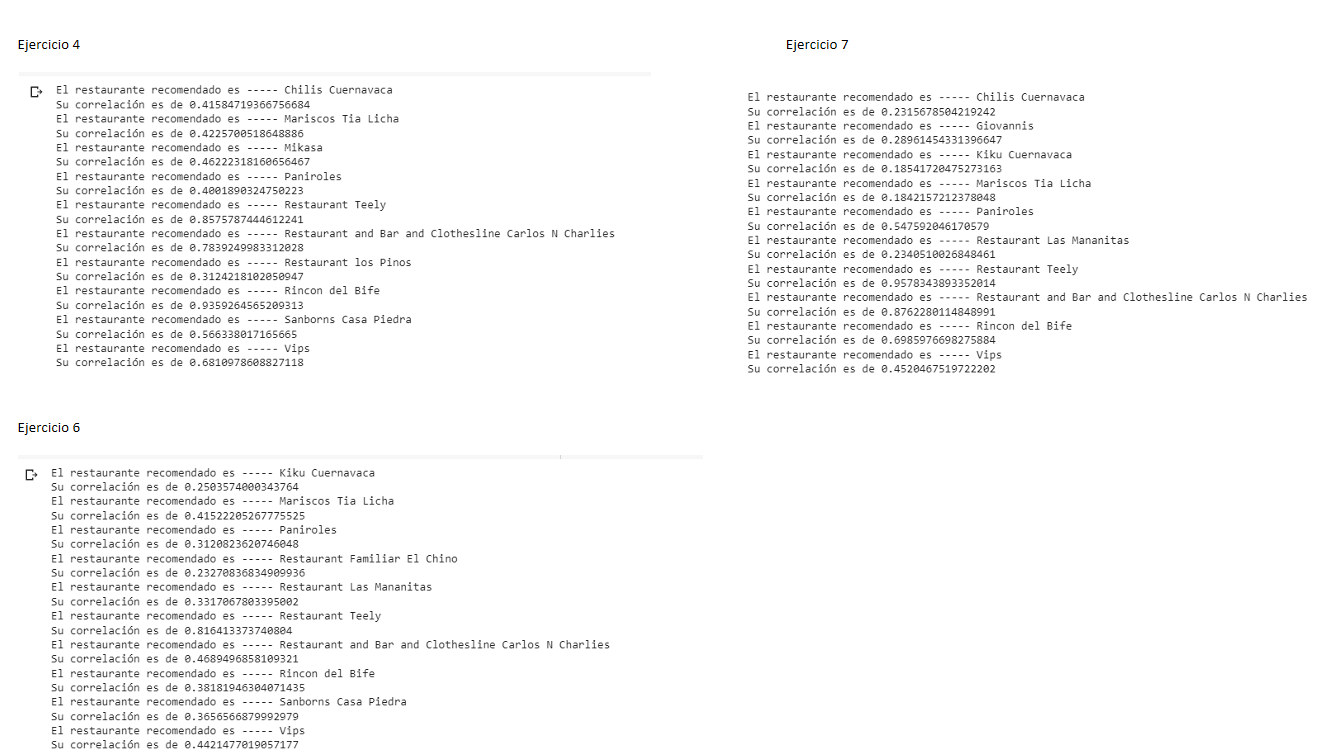

# **Fin de la actividad**